In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score, calinski_harabasz_score


In [ ]:
# Step 2: Upload and Load Dataset
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("AirQualityUCI new.csv")
df = df.drop(columns=['Unnamed: 15', 'Unnamed: 16', 'Date', 'Time'], errors='ignore')
df = df.dropna() #missing value remove


Saving AirQualityUCI new.csv to AirQualityUCI new.csv


In [ ]:
# Step 3: Preprocessing
features = df.columns
X = df[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for 2D Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [ ]:
# Step 4: Apply All Clustering Algorithms
kmeans = KMeans(n_clusters=4, random_state=42)
agglo = AgglomerativeClustering(n_clusters=4)
dbscan = DBSCAN(eps=1.5, min_samples=5)
meanshift = MeanShift()
gmm = GaussianMixture(n_components=4, random_state=42)

labels_kmeans = kmeans.fit_predict(X_scaled)
labels_agglo = agglo.fit_predict(X_scaled)
labels_dbscan = dbscan.fit_predict(X_scaled)
labels_meanshift = meanshift.fit_predict(X_scaled)
labels_gmm = gmm.fit_predict(X_scaled)

In [ ]:
# Step 5: Plotting Function
def plot_clusters(X, labels, title, centers=None):
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=labels, palette='tab10', s=30, legend=False)
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], marker='X', color='black', s=100, label='Centers')
        plt.legend()
    plt.title(title)
    plt.xlabel('PCA1')
    plt.ylabel('PCA2')
    plt.grid(True)
    plt.show()

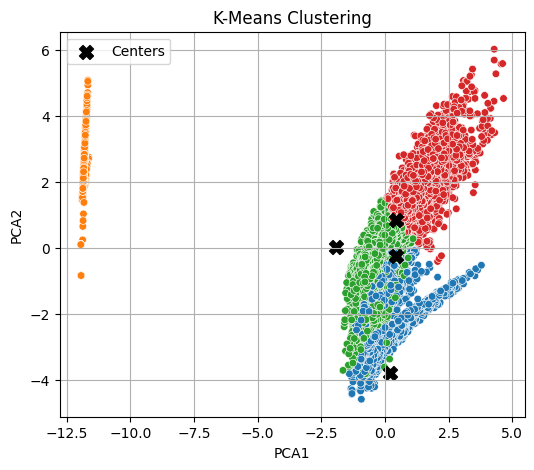

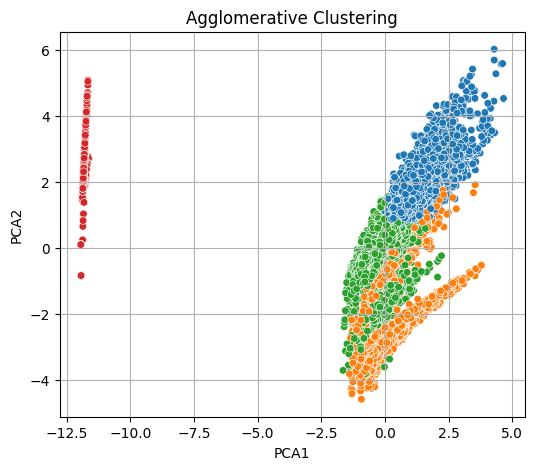

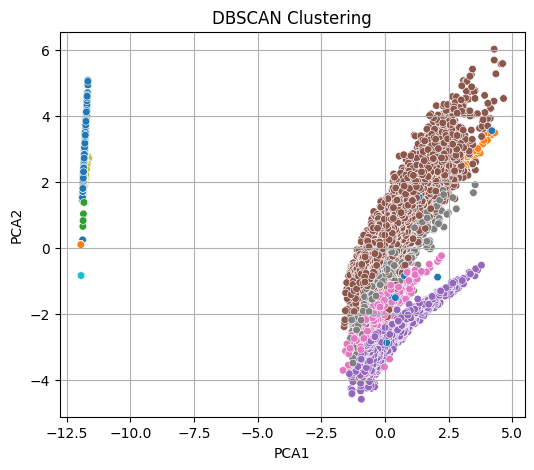

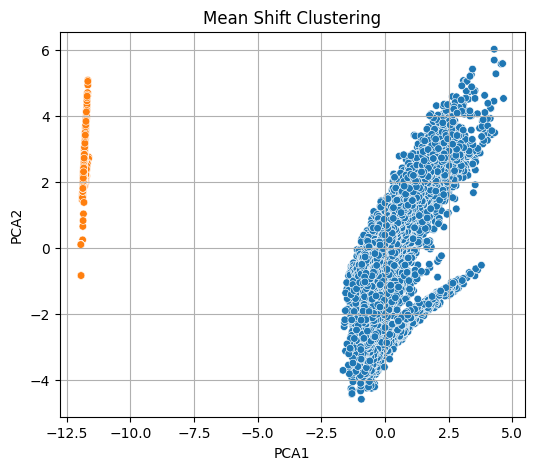

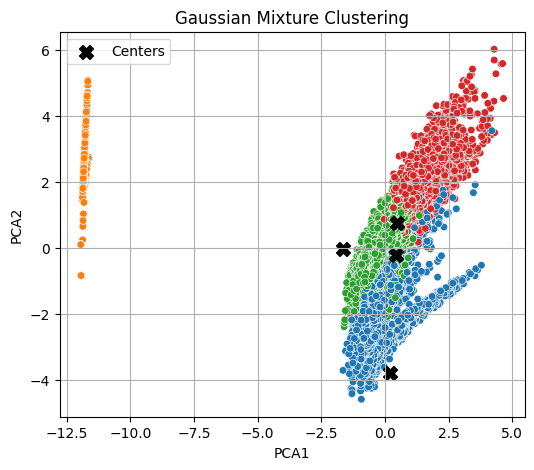

In [ ]:
# Step 6: Visualize All Clusters
plot_clusters(X_pca, labels_kmeans, "K-Means Clustering", centers=kmeans.cluster_centers_)
plot_clusters(X_pca, labels_agglo, "Agglomerative Clustering")
plot_clusters(X_pca, labels_dbscan, "DBSCAN Clustering")
plot_clusters(X_pca, labels_meanshift, "Mean Shift Clustering")
plot_clusters(X_pca, labels_gmm, "Gaussian Mixture Clustering", centers=gmm.means_)

In [ ]:
# Step 7: Evaluation Matrix Function
def evaluate_clustering(X, labels, name):
    n_clusters = len(np.unique(labels))
    if len(set(labels)) > 1 and -1 in labels:
        n_clusters -= 1  # discount DBSCAN noise
    try:
        sil = silhouette_score(X, labels)
        cal = calinski_harabasz_score(X, labels)
    except:
        sil = cal = 'N/A'
    return {
        "Algorithm": name,
        "Clusters": n_clusters,
        "Silhouette Score": sil,
        "Calinski-Harabasz Index": cal
    }

results = []
results.append(evaluate_clustering(X_scaled, labels_kmeans, "K-Means"))
results.append(evaluate_clustering(X_scaled, labels_agglo, "Agglomerative"))
results.append(evaluate_clustering(X_scaled, labels_dbscan, "DBSCAN"))
results.append(evaluate_clustering(X_scaled, labels_meanshift, "Mean Shift"))
results.append(evaluate_clustering(X_scaled, labels_gmm, "Gaussian Mixture"))

# Show Results as DataFrame
results_df = pd.DataFrame(results)
print(results_df)


          Algorithm  Clusters  Silhouette Score  Calinski-Harabasz Index
0           K-Means         4          0.344462              7746.664714
1     Agglomerative         4          0.342147              7412.846853
2            DBSCAN        12          0.318993              1908.836895
3        Mean Shift         2          0.741540              7928.190236
4  Gaussian Mixture         4          0.305170              7258.067440


In [ ]:
print("K-Means Cluster Centers:")
display(kmeans.cluster_centers_)

print("\nGaussian Mixture Cluster Means:")
display(gmm.means_)

K-Means Cluster Centers:


array([[-1.93487575,  0.01157055, -0.26913057,  0.17696339,  0.03647988,
        -1.19808297,  0.20315698, -1.5725991 ,  0.26301807, -0.09228491,
         0.26403797,  0.20598057,  0.20631388],
       [ 0.21813281, -3.78694038, -0.06810049, -4.87857574, -3.19762619,
         0.46492422, -3.09025859,  0.28687399, -3.40652868, -2.57175887,
        -4.85583154, -4.67622423, -4.95611139],
       [ 0.4256888 , -0.23638037, -0.06034164,  0.09057108, -0.34909807,
        -0.18975343,  0.5402141 ,  0.11734273, -0.23905469, -0.4237038 ,
         0.1713345 ,  0.17038879,  0.19975677],
       [ 0.44350193,  0.83509848,  0.25727536,  0.37660577,  0.91862699,
         0.92720036, -0.55386188,  0.69678478,  0.64504161,  1.02835405,
         0.19947646,  0.21187201,  0.20215461]])


Gaussian Mixture Cluster Means:


array([[-1.65804134, -0.04586078, -0.27227629,  0.16381157, -0.04482698,
        -1.15226442,  0.29685168, -1.52355542,  0.16997314, -0.1418894 ,
         0.24458071,  0.21040847,  0.20533952],
       [ 0.21813281, -3.78694038, -0.06810049, -4.87857574, -3.19762619,
         0.46492422, -3.09025859,  0.28687399, -3.40652868, -2.57175887,
        -4.85583154, -4.67622423, -4.95611139],
       [ 0.45651958, -0.2187032 , -0.10877538,  0.08524914, -0.37073027,
        -0.09058154,  0.49598988,  0.24648303, -0.28956995, -0.38740868,
         0.15033393,  0.20529041,  0.1996249 ],
       [ 0.48356135,  0.75124352,  0.32168274,  0.36314035,  0.87120796,
         0.80951574, -0.44907541,  0.65067683,  0.65429648,  0.88137844,
         0.2263372 ,  0.15859401,  0.20207103]])

In [ ]:
print(f"Number of columns used for clustering: {X.shape[1]}")
print("Columns used for clustering:")
display(X.columns.tolist())

Number of columns used for clustering: 13
Columns used for clustering:


['CO(GT)',
 'PT08.S1(CO)',
 'NMHC(GT)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'RH',
 'AH']